<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/%EC%9E%A5%EA%B8%B0/%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%A7%9E%EC%B6%A4%EB%B2%95_%2C_%EC%98%A4%ED%83%80_%EC%8B%A4%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 딥러닝을 활용한 오타 교정기 _ 긴 문장은 잘 못한다
https://github.com/jongmin-oh/korean-typos-corrector

In [ ]:
!pip install transformers
!pip install datsets transformers[sentencepiece]
!pip install SentencePiece

In [ ]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer

# T5 모델 로드
model = T5ForConditionalGeneration.from_pretrained("j5ng/et5-typos-corrector")
tokenizer = T5Tokenizer.from_pretrained("j5ng/et5-typos-corrector")

device = "cuda:0" if torch.cuda.is_available() else "cpu"
# device = "mps:0" if torch.cuda.is_available() else "cpu" # for mac m1

model = model.to(device)

# 예시 입력 문장
input_text = "아늬 진짜 무ㅓ하냐고"

# 입력 문장 인코딩
input_encoding = tokenizer("맞춤법을 고쳐주세요: " + input_text, return_tensors="pt")

input_ids = input_encoding.input_ids.to(device)
attention_mask = input_encoding.attention_mask.to(device)

# T5 모델 출력 생성
output_encoding = model.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    max_length=128,
    num_beams=5,
    early_stopping=True,
)

# 출력 문장 디코딩
output_text = tokenizer.decode(output_encoding[0], skip_special_tokens=True)

# 결과 출력
print(output_text) # 아니 진짜 뭐 하냐고.

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=True`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


아니 진짜 뭐 하냐고.


In [ ]:
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer, pipeline

model = T5ForConditionalGeneration.from_pretrained('j5ng/et5-typos-corrector')
tokenizer = T5Tokenizer.from_pretrained('j5ng/et5-typos-corrector')

typos_corrector = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1,
    framework="pt",
)

input_text = "완죤 어이업ㅅ네진쨬ㅋㅋㅋ"
output_text = typos_corrector("맞춤법을 고쳐주세요: " + input_text,
            max_length=128,
            num_beams=5,
            early_stopping=True)[0]['generated_text']

print(output_text)

완전 어이없네 진짜 ᄏᄏᄏᄏ.


### py-hanspell은 네이버 맞춤법 검사기를 이용한 파이썬용 한글 맞춤법 검사 라이브러리입니다(부산대+다음)
https://github.com/ssut/py-hanspell

In [ ]:
!git clone https://github.com/ssut/py-hanspell.git
%cd py-hanspell
!python setup.py install

In [ ]:
from hanspell import spell_checker

text = "외않되"

spelled_text = spell_checker.check(text)
print(spelled_text)

Checked(result=True, original='외않되', checked='왜 안돼', errors=1, words=OrderedDict([('왜', 1), ('안돼', 1)]), time=0.07389998435974121)


In [ ]:
text = "아버지가방에들어가신다나는오늘코딩을했다"

hanspell_sent = spell_checker.check(text)
print(hanspell_sent.checked)

아버지가 방에 들어가신다 나는 오늘 코딩을 했다


In [ ]:
text = "별 반개도 아깝다 욕나온다 이응경 길용우 연 기 생 활 이몇년인지..정말 발 로해도 그것보단 낫겟다 납치.감금 만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네"

hanspell_sent = spell_checker.check(text)
print(hanspell_sent.checked)

별 반 개도 아깝다 욕 나온다 이응경 길용우 연 기 생활 이 몇 년인지.. 정말 발 로 해도 그것보단 낫겠다 납치. 감금 만 반복 반복.. 이 드라마는 가족도 없다 연기 못하는 사람만 모였네


### PyKoSpacing은 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥 러닝 모델
https://github.com/haven-jeon/PyKoSpacing

In [ ]:
%cd /content
!git clone https://github.com/haven-jeon/PyKoSpacing.git

/content
Cloning into 'PyKoSpacing'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 234 (delta 62), reused 74 (delta 47), pack-reused 137
Receiving objects: 100% (234/234), 2.47 MiB | 2.42 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [ ]:
%cd PyKoSpacing
!pip install numpy==1.19.3
!python setup.py install

In [ ]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

In [ ]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [ ]:
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent)

print(sent) # 원문장
print(kospacing_sent) # PyKoSpacing 사용한 문장

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
별 반 개도 아깝다 욕 나온 다 이 응경 길용우 연 기 생활 이 몇 년인지.. 정말 발 로 해도 그것보단 낫겠다 납치. 감금 만 반복 반복.. 이 드라마는 가족도 없다 연기 못하는 사람만 모였네


In [ ]:
# sent = "별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네"

new_sent = '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네'

spacing = Spacing()
kospacing_sent = spacing(new_sent)

# print(sent) # 원문장
print(kospacing_sent) # PyKoSpacing 사용한 문장

별 반개도 아깝다 욕 나온 다 이 응경 길용우 연기생활이 몇 년인지..정말 발로 해도 그것보단 낫겟다 납치. 감금만 반복 반복..이 드라마는 가족도 없다 연기 못하는 사람만 모엿네


### py-hanspell 넣은 후 결과 값 PyKoSpacing 넣은 결과

In [ ]:
text = "별 반개도 아깝다 욕나온다 이응경 길용우 연 기 생 활 이몇년인지..정말 발 로해도 그것보단 낫겟다 납치.감금 만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네"

hanspell_sent = spell_checker.check(text)
sent_text = hanspell_sent.checked

spacing = Spacing()
kospacing_sent = spacing(sent_text)

print(hanspell_sent.checked)
print(kospacing_sent) # PyKoSpacing 사용한 문장

별 반 개도 아깝다 욕 나온다 이응경 길용우 연 기 생활 이 몇 년인지.. 정말 발 로 해도 그것보단 낫겠다 납치. 감금 만 반복 반복.. 이 드라마는 가족도 없다 연기 못하는 사람만 모였네
별 반 개도 아깝다 욕 나온 다 이 응경 길용우 연 기 생활 이 몇 년인지.. 정말 발 로 해도 그것보단 낫겠다 납치. 감금 만 반복 반복.. 이 드라마는 가족도 없다 연기 못하는 사람만 모였네


### symspellpy를 한글 특성에 맞춰서 수정한 라이브러리.
- 블로그 : https://heegyukim.medium.com/symspell%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%ED%95%9C%EA%B8%80-%EB%A7%9E%EC%B6%A4%EB%B2%95-%EA%B5%90%EC%A0%95-3def9ca00805
- git : https://github.com/HeegyuKim/symspellpy-ko?source=post_page-----7605ec2fcebc--------------------------------


필요 라이브러리
- symspellpy
- hangul_utils

필요한 리소스
- 한글 단어 frequency data https://github.com/hermitdave/FrequencyWords
- 완성형 한글과 조합형 한글

In [ ]:
%cd /content
!git clone https://github.com/HeegyuKim/symspellpy-ko.git

In [ ]:
%cd /content/symspellpy-ko
!pip install symspellpy-ko
# !pip install symspellpy jamo hangul_utils
!wget https://raw.githubusercontent.com/hermitdave/FrequencyWords/master/content/2018/ko/ko_50k.txt

/content/symspellpy-ko
--2023-09-04 06:03:41--  https://raw.githubusercontent.com/hermitdave/FrequencyWords/master/content/2018/ko/ko_50k.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695053 (679K) [text/plain]
Saving to: ‘ko_50k.txt’

ko_50k.txt          100%[===================>] 678.76K  --.-KB/s    in 0.05s   

2023-09-04 06:03:41 (13.0 MB/s) - ‘ko_50k.txt’ saved [695053/695053]



In [ ]:
from symspellpy_ko import KoSymSpell, Verbosity

sym_spell = KoSymSpell()
sym_spell.load_korean_dictionary(decompose_korean=True, load_bigrams=True)

In [ ]:
term = "안뇽하세요"
for suggestion in sym_spell.lookup(term, Verbosity.ALL):
  print(suggestion.term, suggestion.distance, suggestion.count)

안녕하세요 1 3692


In [ ]:
text = "그래도 괜찮지앟ㄴ을까"
for suggestion in sym_spell.lookup_compound(text, max_edit_distance=2):
  print(suggestion.term, suggestion.distance, suggestion.count)

그래도 괜찮지 않을까 23 0


In [ ]:
text = "감기빨리치료해줘"
comp = sym_spell.word_segmentation(text, max_edit_distance=0)
print(comp.corrected_string)

감기 빨리 치료 해줘


In [ ]:
text = "별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네"

for suggestion in sym_spell.lookup_compound(text, max_edit_distance=2):
  print(suggestion.term, suggestion.distance, suggestion.count)

comp = sym_spell.word_segmentation(text, max_edit_distance=0)
print(comp.corrected_string)

별 안해도 아깝다 이 나온다 이등병 기 용의 연기생활이몇년인지 정말 바 올해도 그것보단 낫겠다 납치 감금만반복반복 이 드라마를 가족 없다 연기못하는사람만모엿네 109 0
별 반 개도 아깝다 욕 나온다 이 응 경 길 용 우 연기 생활이 몇년 인지 .. 정말 발로 해도 그것보단 낫게 ㅅ 다 납치. 감금 만 반복 반복 .. 이 드라마 는 가족도 없다 연기 못하는 사람만 모여 ㅅ 네


### tts


In [1]:
!git clone https://github.com/ttop32/coqui_tts_korea

Cloning into 'coqui_tts_korea'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 160 (delta 26), reused 24 (delta 7), pack-reused 107
Receiving objects: 100% (160/160), 2.85 MiB | 26.49 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [ ]:
!pip install gTTS
!pip install TTS
!pip install gdown -U --no-cache-dir
!pip install jamo
!pip install librosa

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from gtts import gTTS
import IPython
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [8]:
text = """051 난장이가 쏘아 올린 작은 공 - 조세희어머니는 조각마루 끝에 앉아 말이 없었다. 벽돌 공장의 높은 굴뚝 그림자가 시멘트 담에서 꺾어지며 좁은 마당을 덮었다. 동네 사람들이 골목으로 나와 뭐라고 소리치고 있었다. 통장은 그들 사이를비집고 나와 방죽 쪽으로 걸음을 옮겼다. 어머니는 식사를 끝내지 않은 밥상을 들고 부엌으로 들어갔다. 어머니는 두 무릎을 곧추세우고 앉았다. 그리고, 손을 들어 부엌 바닥을 한 번 치고 가슴을 한 번쳤다. 나는 동사무소로 갔다. 행복동 주민들이 잔뜩 몰려들어 자기의 의견들을 큰 소리로 말하고 있었다. 들을 사람은 두셋밖에 안 되는데 수십 명이 거의 동시에 떠들어대고 있었다. 쓸데없는 짓이었다.
떠든다고 해결될 문제는 아니었다.
나는 바깥 게시판에 적혀 있는 공고문을 읽었다. 거기에는 아파트 입주 절차와 아파트 입주를 포기할 경우 탈 수 있는 이주 보조금 액수 등이 적혀 있었다. 동사무소 주위는 시장바닥과 같았다. 주민들과 아파트 거간꾼들이 한데 뒤엉켜 이리 몰리고 저리 몰리고 했다. 나는 거기서 아버지와 두 동생을만났다. 아버지는 도장포 앞에 앉아 있었다. 영호는 내가 방금 물러선 게시판 앞으로 갔다. 영희는 골목 입구에 세워 놓은 검정색 승용차 옆에 서 있었다. 아침 일찍 일들을 찾아 나섰다가 철거 계고장이나왔다는 소리를 듣고 돌아온 것이었다. 누군들 이런 날 일을 할 수 있을까. 나는 아버지 옆으로 가아버지의 공구들이 들어 있는 부대를 둘러메었다. 영호가 다가오더니 나의 어깨에서 그 부대를 내려옮겨 메었다. 나는 아주 자연스럽게 그것을 넘겨주면서 이쪽으로 걸어오는 영희를 보았다. 영희의 얼굴은 발갛게 상기되어 있었다. 몇 사람의 거간꾼들이 우리를 둘러싸고 아파트 입주권을 팔라고 했다.
아버지가 책을 읽고 있었다. 우리는 아버지가 책을 읽는 것을 처음 보았다. 표지를 쌌기 때문에 무슨책을 읽는지도 알 수 없었다. 영희가 허리를 굽혀 아버지의 손을 잡아끌었다. 아버지는 우리들의 얼굴을 물끄러미 쳐다보더니 자리를 털고 일어났다. “난장이가 간다"고 처음 보는 사람들이 말했다.
어머니는 대문 기둥에 붙어 있는 알루미늄 표찰을 떼기 위해 식칼로 못을 뽑고 있었다. 내가 식칼을 받아 반대쪽 못을 뽑았다. 영호는 어머니와 내가 하는 일이 못마땅한 모양이었다. 그러나 마음에드는 일이 우리에게 일어나 주기를 바랄 수는 없는 일이었다. 어머니는 무허가 건물 번호가 새겨진알루미늄 표찰을 빨리 떼어 간직하지 않으면 나중에 괴로운 일이 생길 것이라는 것을 알고 있었다.
어머니는 손바닥에 놓인 표찰을 말없이 들여다보았다. 영희가 이번에는 어머니의 손을 잡아끌었다.
ㅜㅜ"""

In [9]:
if __name__ == '__main__':

    tts = gTTS(text=text, lang='ko', slow = False)
    # sSaveFile = "test_intro.mp3"
    # tts.save(sSaveFile)
    savefile = "test.wav"
    tts.save(savefile)
    print(savefile +"file saved")

test.wavfile saved


In [10]:
# displayWaveImage("/content/test.wav")
IPython.display.Audio("/content/test.wav")

In [ ]:
# import coqui_tts_korea.korean as korean
# import IPython
# import librosa
# import librosa.display
# import matplotlib.pyplot as plt

# def koreanCleaner(text):
#     return "".join(korean.tokenize(text))

# def displayWaveImage(path):
#     x, sr = librosa.load(path)
#     plt.figure(figsize=(14, 5))
#     librosa.display.waveplot(x, sr=sr)

In [ ]:
# ##inference Using trained Vocoder
# input_text = """어머니는 조각마루 끝에 앉아 말이 없었다. 벽돌 공장의 높은 굴뚝 그림자가 시멘트 담에서 꺾어지며 좁은 마당을 덮었다. 동네 사람들이 골목으로 나와 뭐라고 소리치고 있었다. 통장은 그들 사이를비집고 나와 방죽 쪽으로 걸음을 옮겼다. 어머니는 식사를 끝내지 않은 밥상을 들고 부엌으로 들어갔다. 어머니는 두 무릎을 곧추세우고 앉았다. 그리고, 손을 들어 부엌 바닥을 한 번 치고 가슴을 한 번쳤다. 나는 동사무소로 갔다. 행복동 주민들이 잔뜩 몰려들어 자기의 의견들을 큰 소리로 말하고 있었다. 들을 사람은 두셋밖에 안 되는데 수십 명이 거의 동시에 떠들어대고 있었다. 쓸데없는 짓이었다.
# 떠든다고 해결될 문제는 아니었다.
# 나는 바깥 게시판에 적혀 있는 공고문을 읽었다. 거기에는 아파트 입주 절차와 아파트 입주를 포기할 경우 탈 수 있는 이주 보조금 액수 등이 적혀 있었다. 동사무소 주위는 시장바닥과 같았다. 주민들과 아파트 거간꾼들이 한데 뒤엉켜 이리 몰리고 저리 몰리고 했다. 나는 거기서 아버지와 두 동생을만났다. 아버지는 도장포 앞에 앉아 있었다. 영호는 내가 방금 물러선 게시판 앞으로 갔다. 영희는 골목 입구에 세워 놓은 검정색 승용차 옆에 서 있었다. 아침 일찍 일들을 찾아 나섰다가 철거 계고장이나왔다는 소리를 듣고 돌아온 것이었다. 누군들 이런 날 일을 할 수 있을까. 나는 아버지 옆으로 가아버지의 공구들이 들어 있는 부대를 둘러메었다. 영호가 다가오더니 나의 어깨에서 그 부대를 내려옮겨 메었다. 나는 아주 자연스럽게 그것을 넘겨주면서 이쪽으로 걸어오는 영희를 보았다. 영희의 얼굴은 발갛게 상기되어 있었다. 몇 사람의 거간꾼들이 우리를 둘러싸고 아파트 입주권을 팔라고 했다.
# 아버지가 책을 읽고 있었다. 우리는 아버지가 책을 읽는 것을 처음 보았다. 표지를 쌌기 때문에 무슨책을 읽는지도 알 수 없었다. 영희가 허리를 굽혀 아버지의 손을 잡아끌었다. 아버지는 우리들의 얼굴을 물끄러미 쳐다보더니 자리를 털고 일어났다. “난장이가 간다"고 처음 보는 사람들이 말했다.
# 어머니는 대문 기둥에 붙어 있는 알루미늄 표찰을 떼기 위해 식칼로 못을 뽑고 있었다. 내가 식칼을 받아 반대쪽 못을 뽑았다. 영호는 어머니와 내가 하는 일이 못마땅한 모양이었다. 그러나 마음에드는 일이 우리에게 일어나 주기를 바랄 수는 없는 일이었다. 어머니는 무허가 건물 번호가 새겨진알루미늄 표찰을 빨리 떼어 간직하지 않으면 나중에 괴로운 일이 생길 것이라는 것을 알고 있었다.
# 어머니는 손바닥에 놓인 표찰을 말없이 들여다보았다. 영희가 이번에는 어머니의 손을 잡아끌었다."""
# inputText=koreanCleaner(input_text)

# !tts \
#     --text "$inputText" \
#     --model_path glowtts_korea/checkpoint.pth.tar \
#     --config_path glowtts_korea/config.json \
#     --out_path output.wav \
#     --vocoder_path mbmelgan_korea/checkpoint.pth.tar \
#     --vocoder_config_path mbmelgan_korea/config.json



# displayWaveImage("output.wav")
# IPython.display.Audio("output.wav")

In [ ]:
# ##inference Using trained Vocoder
# input_text = """051 난장이가 쏘아 올린 작은 공 - 조세희어머니는 조각마루 끝에 앉아 말이 없었다. 벽돌 공장의 높은 굴뚝 그림자가 시멘트 담에서 꺾어지며 좁은 마당을 덮었다. 동네 사람들이 골목으로 나와 뭐라고 소리치고 있었다. 통장은 그들 사이를비집고 나와 방죽 쪽으로 걸음을 옮겼다. 어머니는 식사를 끝내지 않은 밥상을 들고 부엌으로 들어갔다. 어머니는 두 무릎을 곧추세우고 앉았다. 그리고, 손을 들어 부엌 바닥을 한 번 치고 가슴을 한 번쳤다. 나는 동사무소로 갔다. 행복동 주민들이 잔뜩 몰려들어 자기의 의견들을 큰 소리로 말하고 있었다. 들을 사람은 두셋밖에 안 되는데 수십 명이 거의 동시에 떠들어대고 있었다. 쓸데없는 짓이었다.
# 떠든다고 해결될 문제는 아니었다.
# 나는 바깥 게시판에 적혀 있는 공고문을 읽었다. 거기에는 아파트 입주 절차와 아파트 입주를 포기할 경우 탈 수 있는 이주 보조금 액수 등이 적혀 있었다. 동사무소 주위는 시장바닥과 같았다. 주민들과 아파트 거간꾼들이 한데 뒤엉켜 이리 몰리고 저리 몰리고 했다. 나는 거기서 아버지와 두 동생을만났다. 아버지는 도장포 앞에 앉아 있었다. 영호는 내가 방금 물러선 게시판 앞으로 갔다. 영희는 골목 입구에 세워 놓은 검정색 승용차 옆에 서 있었다. 아침 일찍 일들을 찾아 나섰다가 철거 계고장이나왔다는 소리를 듣고 돌아온 것이었다. 누군들 이런 날 일을 할 수 있을까. 나는 아버지 옆으로 가아버지의 공구들이 들어 있는 부대를 둘러메었다. 영호가 다가오더니 나의 어깨에서 그 부대를 내려옮겨 메었다. 나는 아주 자연스럽게 그것을 넘겨주면서 이쪽으로 걸어오는 영희를 보았다. 영희의 얼굴은 발갛게 상기되어 있었다. 몇 사람의 거간꾼들이 우리를 둘러싸고 아파트 입주권을 팔라고 했다.
# 아버지가 책을 읽고 있었다. 우리는 아버지가 책을 읽는 것을 처음 보았다. 표지를 쌌기 때문에 무슨책을 읽는지도 알 수 없었다. 영희가 허리를 굽혀 아버지의 손을 잡아끌었다. 아버지는 우리들의 얼굴을 물끄러미 쳐다보더니 자리를 털고 일어났다. “난장이가 간다"고 처음 보는 사람들이 말했다.
# 어머니는 대문 기둥에 붙어 있는 알루미늄 표찰을 떼기 위해 식칼로 못을 뽑고 있었다. 내가 식칼을 받아 반대쪽 못을 뽑았다. 영호는 어머니와 내가 하는 일이 못마땅한 모양이었다. 그러나 마음에드는 일이 우리에게 일어나 주기를 바랄 수는 없는 일이었다. 어머니는 무허가 건물 번호가 새겨진알루미늄 표찰을 빨리 떼어 간직하지 않으면 나중에 괴로운 일이 생길 것이라는 것을 알고 있었다.
# 어머니는 손바닥에 놓인 표찰을 말없이 들여다보았다. 영희가 이번에는 어머니의 손을 잡아끌었다.
# ㅜㅜ"""
# inputText=koreanCleaner(input_text)

# !tts \
#     --text "$inputText" \
#     --model_path finetune_glowtts_korea/checkpoint.pth.tar \
#     --config_path finetune_glowtts_korea/config.json \
#     --out_path output.wav \
#     --vocoder_path finetune_mbmelgan_korea/checkpoint.pth.tar \
#     --vocoder_config_path finetune_mbmelgan_korea/config.json



# displayWaveImage("output.wav")
# IPython.display.Audio("output.wav")

### STT

In [ ]:
# 필요 library 설치
!pip install SpeechRecognition
!pip install librosa
!pip install -U pip
!pip install -U pyaudio

In [ ]:
import speech_recognition as sr
r = sr.Recognizer()

# recognize_google() : Google Web Speech API
# recognize_google_cloud() : Google Cloud Speech API
# recognize_bing() : Microsoft Bing Speech API
# recognize_houndify() : SoundHound Houndify API
# recognize_ibm() : IBM Speech to Text API
# recognize_wit() : Wit.ai API
# recognize_sphinx() : CMU Sphinx (오프라인에서 동작 가능)


import librosa
sample_wav, rate = librosa.core.load('/content/test.wav')

korean_audio = sr.AudioFile('/content/test.wav')

In [ ]:
with korean_audio as source:
    audio = r.record(source)

r.recognize_google(audio_data=audio, language='ko-KR')

### git
https://github.com/sooftware/kospeech

In [ ]:
# !git clone https://github.com/sooftware/kospeech.git

In [ ]:
# !python3 /content/kospeech/bin/inference.py --model_path $MODEL_PATH --audio_path $AUDIO_PATH --device $DEVICE

Traceback (most recent call last):
  File "/content/kospeech/bin/inference.py", line 22, in <module>
    from kospeech.vocabs.ksponspeech import KsponSpeechVocabulary
ModuleNotFoundError: No module named 'kospeech'


### 음성인식 실습
참고 : https://colab.research.google.com/drive/1g8TYPv9sy4usQsHSB7tm8OiB6Q6gO0VE?usp=sharing
220922, by *wygo*

- OpenAI의 , 27sec 음성을 12sec 이내에 음성인식 완료. 성능도 괜찮음

- [실습코드](https://github.com/airobotlab/asr_whisper_korea_colab)
- [blog](https://openai.com/blog/whisper/)
- [paper](https://cdn.openai.com/papers/whisper.pdf)
- [code](https://github.com/openai/whisper)

![model architecture](https://github.com/openai/whisper/raw/main/approach.png)

# 0. 음성인식 모델 셋팅
### openai의 whisper 모델

In [6]:
## install
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-gesux1b3
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-gesux1b3
  Resolved https://github.com/openai/whisper.git to commit e8622f9afc4eba139bf796c210f5c01081000472
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.1 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230314-py3-none-any.whl size=798395 sha256=a688268a814b7af9955bc920213942af2b07c48d591c27229965735593382b54
  Stored in directory: /tmp/pip-ephem-wheel-cache-2_hk_g4c/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper
DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A p

In [13]:
## import
import whisper
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
from pprint import pprint

# 1. audio 데이터

# - [음성다운사이트](https://xn--2n1bk9rtmh26jp7fdva.com/3541)

In [ ]:
# ## 1.1. 음성파일 업로드
# from google.colab import files
# file_uploaded = files.upload()
# input_audio_path = list(file_uploaded.keys())[0]
# print('file name: %s'%input_audio_path)

In [ ]:
# ## 1.2. 예시 음성파일 사용
# !git clone https://github.com/airobotlab/asr_whisper_korea_colab.git
# !mv asr_whisper_korea_colab/sample_audio/* ./

# input_audio_path = 'audio1.mp3'  # 한국어1
# # input_audio_path = 'audio2.wav'  # 한국어2
# # input_audio_path = 'audio3.wav'  # 한국어3
# # input_audio_path = 'audio_jp.mp3'  # 일본어, 14sec

Cloning into 'asr_whisper_korea_colab'...
fatal: could not read Username for 'https://github.com': No such device or address
mv: cannot stat 'asr_whisper_korea_colab/sample_audio/*': No such file or directory


# 2. audio 분석

AttributeError: ignored

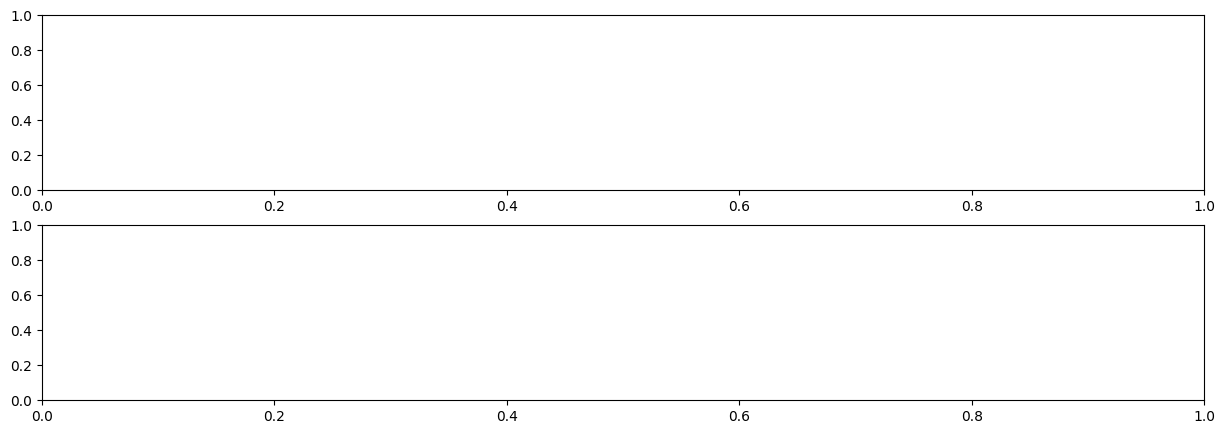

In [14]:
## analyze audio with librosa
input_audio_path = "/content/test.wav"
x, sr = librosa.load(input_audio_path)
fig, ax = plt.subplots(figsize=(15, 5), nrows=2, ncols=1, sharex=False)

librosa.display.waveplot(x, sr=sr, ax=ax[0], x_axis='time')
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

D = librosa.amplitude_to_db(np.abs(librosa.stft(x, hop_length=160)), ref=np.max)
tmp = librosa.display.specshow(D, y_axis='mel', sr=sr, hop_length=160, x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
# fig.colorbar(tmp, ax=ax[1], format="%+2.f dB")
plt.plot()

import IPython.display as ipd
ipd.Audio(input_audio_path) # load a local WAV file

# 3. 음성인식 모델 준비

In [15]:
## load model
model = whisper.load_model("small")
print(f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
      f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters.")

100%|███████████████████████████████████████| 461M/461M [00:11<00:00, 42.2MiB/s]


Model is multilingual and has 240,582,912 parameters.


In [16]:
## load audio and pad/trim it to fit 30
# input_audio_path = 'audio1.mp3'
audio_raw = whisper.load_audio(input_audio_path)
audio = whisper.pad_or_trim(audio_raw)

print('%s -> %s'%(audio.shape,audio.shape))
print('max value: %s'%audio.max())
print('min value: %s'%audio.min())

(480000,) -> (480000,)
max value: 0.5310364
min value: -0.6008301


torch.Size([80, 3000])
tensor([-0.6953, -0.6953, -0.6953,  ..., -0.6953, -0.6953, -0.6953],
       device='cuda:0')
max value: 0.5310364
min value: -0.6008301


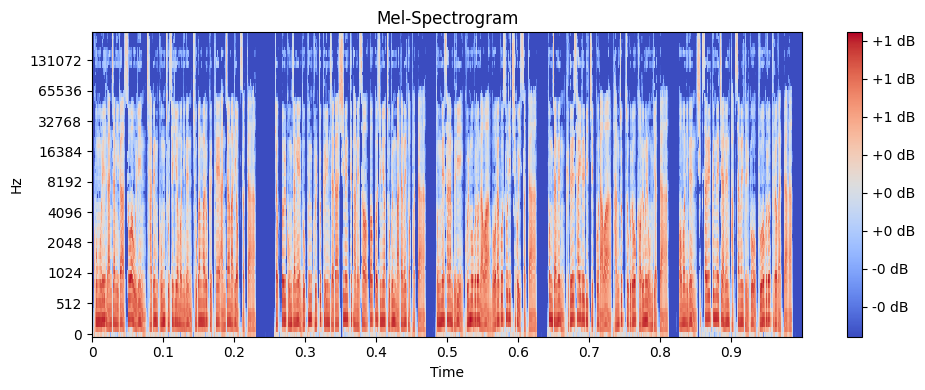

In [19]:
## make log-Mel spectrogram and move to the same device as the model
melspectrogram = whisper.log_mel_spectrogram(audio).to(model.device)

print(melspectrogram.shape)
print(melspectrogram[0])
print('max value: %s'%audio.max())
print('min value: %s'%audio.min())

# plot log_melspectogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspectrogram.cpu().numpy(), y_axis='mel', x_axis='time', sr=16000, hop_length=160)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')
plt.show()

## 4. 음성인식!

In [20]:
## run ASR
# decode the audio
options = whisper.DecodingOptions()
result = whisper.decode(model, melspectrogram, options)

# print the recognized text
print(result.text)

공호일 난장이가 쏘아 올린 작은 공조세희 어머니는 조강마루 끝에 앉아말이 없었다. 벽돌 공장에 높은 굴뚝 그림자가 시멘트 담에서 꺾어지며 좁은 마당을 덮었다. 동네 사람들이 골목으로 나와 뭐라고 소리치고 있었다. 통장은 그들 사이를 비집고 나와 방죽 쪽으로 걸음을 옮겼다.
